In [1]:
# Imports:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import dxchange
import nibabel as nib
import tifffile
from skimage.filters import threshold_otsu
os.chdir('/dtu/3d-imaging-center/courses/02509/groups/members/s194333/HPC3D_project')

astropy module not found


In [2]:
folder_path = '/dtu/3d-imaging-center/courses/02509/groups/group01/Lava_data/Island_ny/'
file_name = 'lavasten_Island_ny_LFOV-80kV-LE2-1.8s-21.8micro_recon.txm'
absolute_path = os.path.join(folder_path, file_name)
data_org = dxchange.reader.read_txm(absolute_path)

In [3]:
print(data_org[1].keys())
data_org_vol = data_org[0]

dict_keys(['facility', 'image_width', 'image_height', 'data_type', 'number_of_images', 'pixel_size', 'reference_filename', 'reference_data_type', 'thetas', 'x_positions', 'y_positions', 'z_positions', 'x-shifts', 'y-shifts', 'reference'])


In [4]:

print(data_org[1]['image_width'])
print(data_org[1]['image_height'])
print(data_org[1]['number_of_images'])
print(data_org_vol.shape)
print(data_org[1]['pixel_size'])
print(data_org_vol.dtype)
print(data_org_vol.max())
print(data_org_vol.min())

1004
1024
1018
(1018, 1024, 1004)
21.822635650634766
uint16
65535
0


In [5]:
pixel_size = data_org[1]['pixel_size']
print(pixel_size)
img_shape = data_org_vol.shape
print(img_shape)
img_shape_array = np.array(img_shape)
total_size = img_shape_array * pixel_size
total_size__mm = total_size/1000
print(total_size__mm)
pixel_size_mm = pixel_size/1000
pixels_per_mm = 1/pixel_size_mm
print(pixels_per_mm)

21.822635650634766
(1018, 1024, 1004)
[22.21544309 22.34637891 21.90992619]
45.823979101759534


In [6]:
folder_path = '/dtu/3d-imaging-center/courses/02509/groups/group01/data'
file_name = 'lavasten_Island_ny_LFOV-80kV-LE2-1.8s-21.8micro_recon.tiff'
absolute_path = os.path.join(folder_path, file_name)
data = tifffile.imread(absolute_path)

In [7]:
print(data.shape)
print(data.dtype)
print(data.max())
print(data.min())

(1018, 1024, 1004)
uint16
65535
0


In [8]:
# crop 5mm times 5mm times 5mm
crop_size = int(5*pixels_per_mm)
print(crop_size)

229


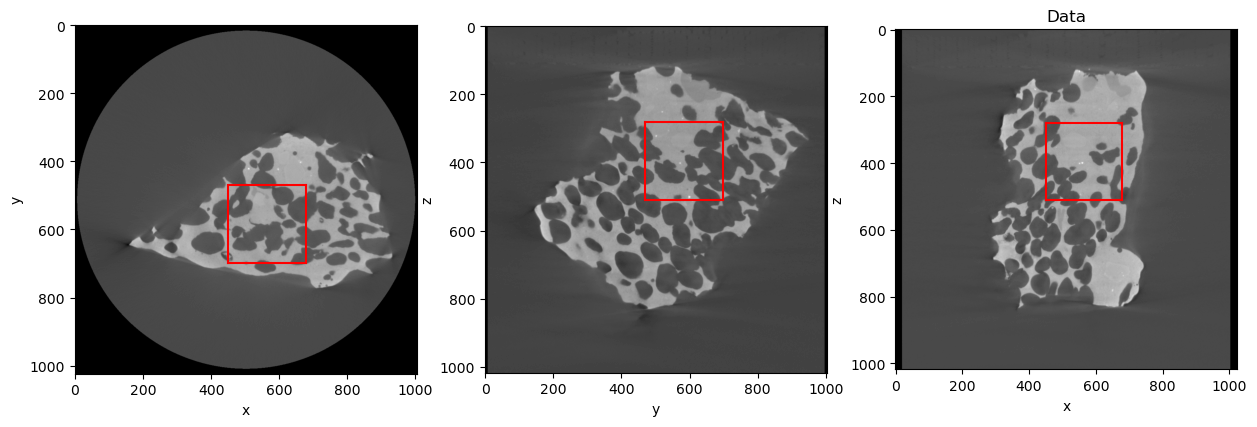

In [9]:
# visualize the data
start_x = 450#440
end_x = start_x + crop_size
start_y = 470#420
end_y = start_y + crop_size
start_z = 280#280
end_z = start_z + crop_size
slice = 100# crop_size
slice_x = start_x + slice
slice_y = start_y + slice
slice_z = start_z + slice
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(data[slice_z, :, :], cmap='gray')
# visualize the crop box
ax[0].plot([start_x, end_x], [start_y, start_y], 'r')
ax[0].plot([start_x, end_x], [end_y, end_y], 'r')
ax[0].plot([start_x, start_x], [start_y, end_y], 'r')
ax[0].plot([end_x, end_x], [start_y, end_y], 'r')
# ad axes labels
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].imshow(data[:,slice_x, :], cmap='gray')
ax[1].plot([start_y, end_y], [start_z, start_z], 'r')
ax[1].plot([start_y, end_y], [end_z, end_z], 'r')
ax[1].plot([start_y, start_y], [start_z, end_z], 'r')
ax[1].plot([end_y, end_y], [start_z, end_z], 'r')
ax[1].set_xlabel('y')
ax[1].set_ylabel('z')
ax[2].imshow(data[:, :, slice_y], cmap='gray')
ax[2].plot([start_x, end_x], [start_z, start_z], 'r')
ax[2].plot([start_x, end_x], [end_z, end_z], 'r')
ax[2].plot([start_x, start_x], [start_z, end_z], 'r')
ax[2].plot([end_x, end_x], [start_z, end_z], 'r')
ax[2].set_xlabel('x')
ax[2].set_ylabel('z')
plt.title('Data')
plt.show()

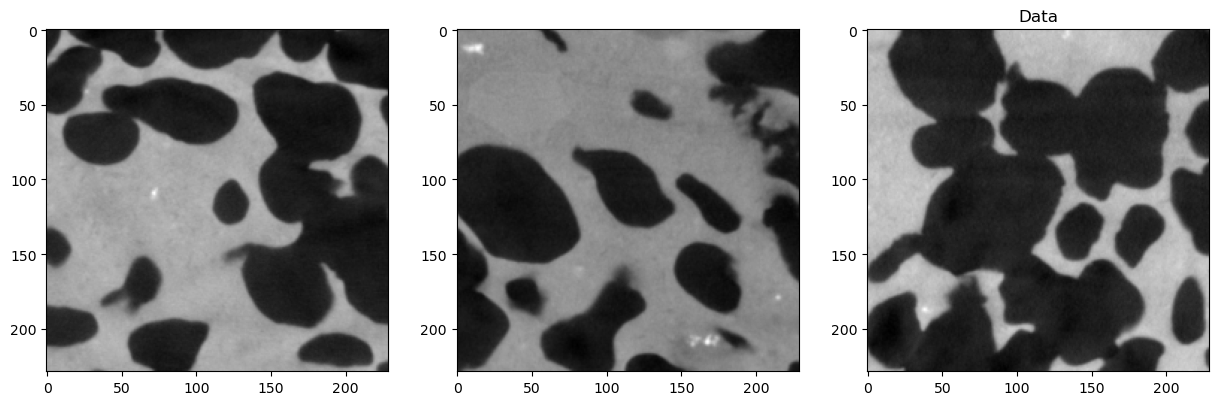

In [10]:

data_crop = data[start_z:end_z, start_x:end_x, start_y:end_y]
slice = 200
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(data_crop[slice, :, :], cmap='gray')
ax[1].imshow(data_crop[:,slice, :], cmap='gray')
ax[2].imshow(data_crop[:, :, slice], cmap='gray')
plt.title('Data')
plt.show()

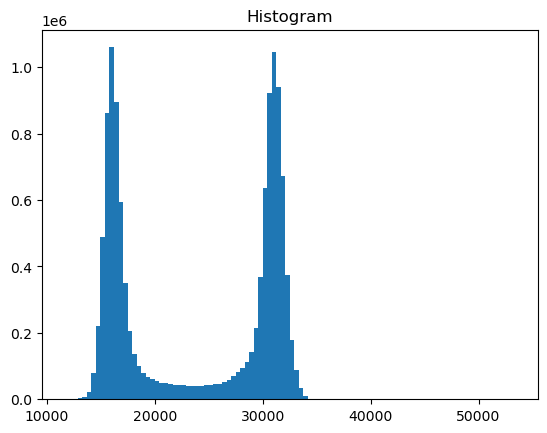

In [11]:
# make histogram
plt.hist(data_crop.flatten(), bins=100)
plt.title('Histogram')
plt.show()


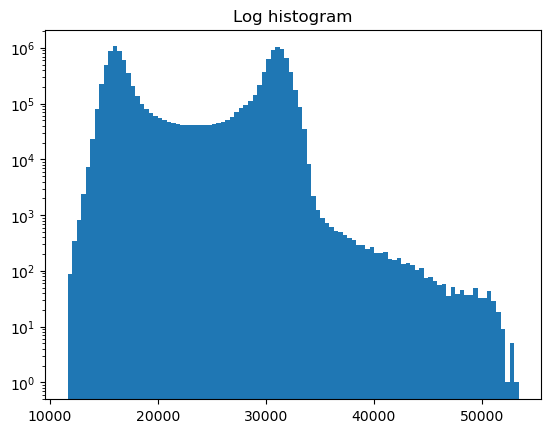

In [12]:
# make a log y histogram
plt.hist(data_crop.flatten(), bins=100)
plt.yscale('log')
plt.title('Log histogram')
plt.show()

In [13]:
global_threshold_otsu = threshold_otsu(data_crop)

In [14]:
air_stone_threshold = global_threshold_otsu
stone_krystal_threshold = 35000
data_air = data_crop < air_stone_threshold
data_stone = (data_crop > air_stone_threshold) & (data_crop < stone_krystal_threshold)
data_krystal = data_crop > stone_krystal_threshold

segmented_data = np.zeros(data_crop.shape)
segmented_data[data_air] = 0
segmented_data[data_stone] = 1
segmented_data[data_krystal] = 2


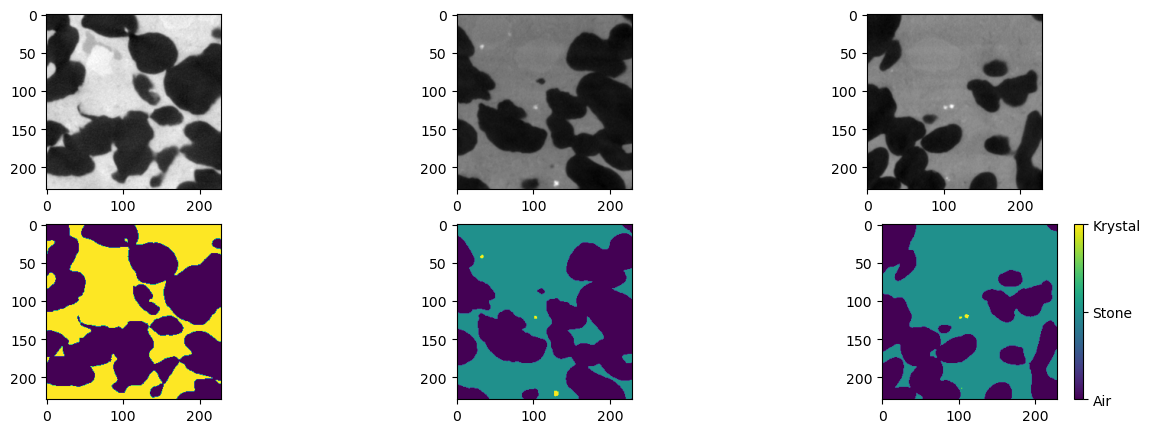

In [15]:
air_stone_threshold = global_threshold_otsu
stone_krystal_threshold = 38000
data_air = data_crop < air_stone_threshold
data_stone = (data_crop > air_stone_threshold) & (data_crop < stone_krystal_threshold)
data_krystal = data_crop > stone_krystal_threshold

segmented_data = np.zeros(data_crop.shape)
segmented_data[data_air] = 0
segmented_data[data_stone] = 1
segmented_data[data_krystal] = 2

# visualize the segmented data
slice = 100
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
ax[0,0].imshow(data_crop[slice, :, :], cmap='gray')
ax[0,1].imshow(data_crop[:,slice, :], cmap='gray')
ax[0,2].imshow(data_crop[:, :, slice], cmap='gray')
ax[1,0].imshow(segmented_data[slice, :, :])
ax[1,1].imshow(segmented_data[:,slice, :])
ax[1,2].imshow(segmented_data[:, :, slice])
# color bar
cbar = plt.colorbar(ax[1,2].imshow(segmented_data[:, :, slice]))
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Air', 'Stone', 'Krystal'])

plt.show()

It is not going to be possible to segment out the krystals from the stone

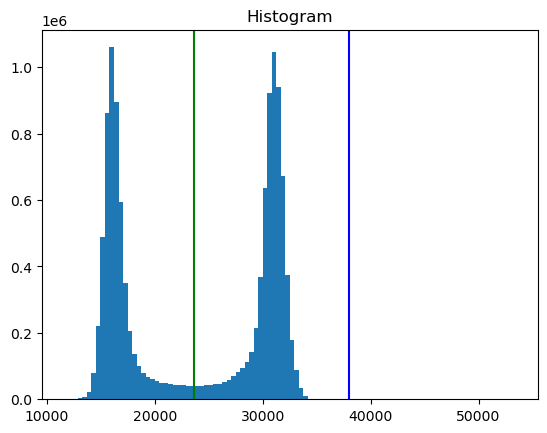

In [16]:
# make histogram
plt.hist(data_crop.flatten(), bins=100)
plt.axvline(air_stone_threshold, color='g')
plt.axvline(stone_krystal_threshold, color='b')
plt.title('Histogram')
plt.show()


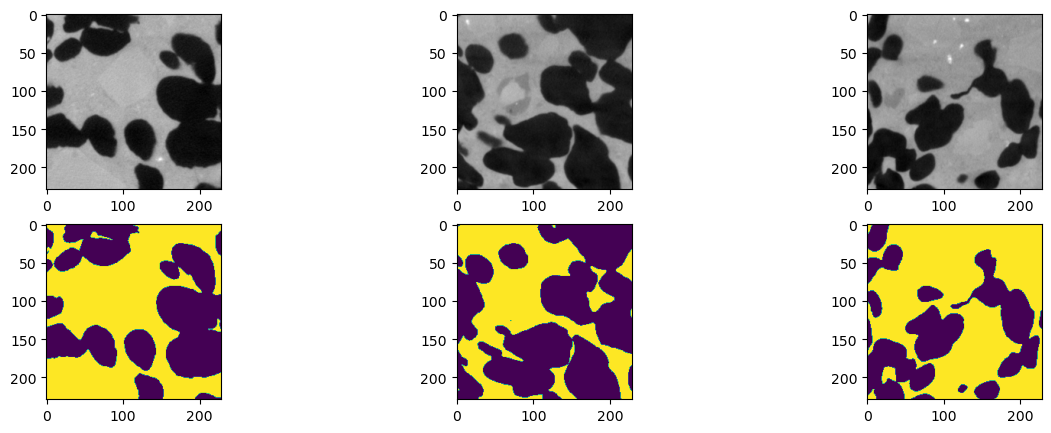

In [17]:
bin_data = data_crop > global_threshold_otsu

slice = 50
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
ax[0,0].imshow(data_crop[slice, :, :], cmap='gray')
ax[0,1].imshow(data_crop[:,slice, :], cmap='gray')
ax[0,2].imshow(data_crop[:, :, slice], cmap='gray')
ax[1,0].imshow(bin_data[slice, :, :])
ax[1,1].imshow(bin_data[:,slice, :])
ax[1,2].imshow(bin_data[:, :, slice])

plt.show()

In [18]:
# save croped data
folder_path = 'results'
file_name = 'data_crop.tiff'
absolute_path = os.path.join(folder_path, file_name)
dxchange.write_tiff(data_crop, absolute_path, dtype='uint16', overwrite=True)

# save the bin data
file_name = 'bin_data_crop.tiff'
absolute_path = os.path.join(folder_path, file_name)
dxchange.write_tiff(bin_data, absolute_path, dtype='uint8', overwrite=True)

# save the segmented data
file_name = 'segmented_data_crop.tiff'
absolute_path = os.path.join(folder_path, file_name)
dxchange.write_tiff(segmented_data, absolute_path, dtype='uint8', overwrite=True)


In [19]:
import localthickness as lt

In [20]:
thickness = lt.local_thickness(bin_data)

55.163395
2407.6213
Median: 911.672607421875  |  Mean: 1119.666259765625


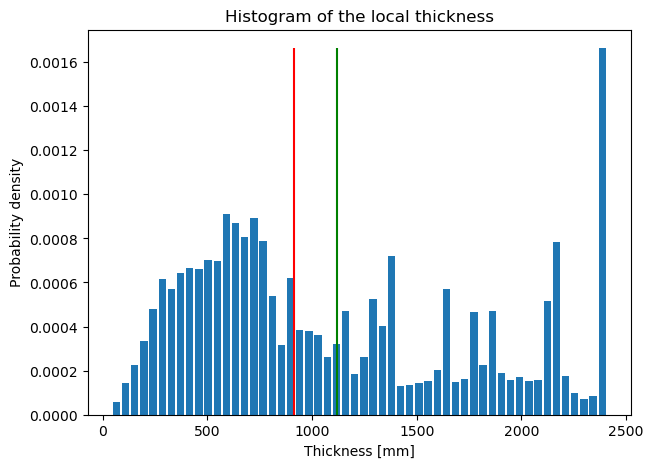

In [21]:
# Save the maximum value of thickness
vmax = np.max(thickness)
print(vmax)
#thickness is only the radius
thickness_new = 2*thickness
# we want it in real world units
thickness_new *= pixel_size

real_vmax = np.max(thickness_new)
real_vmin = np.min(thickness_new[thickness_new>0])
print(real_vmax)

# Compute median and mean value of the thickness
t = thickness_new[thickness_new>0].flatten()
medianThick = np.median(t)
meanThick = np.mean(t)
print(f'Median: {medianThick}  |  Mean: {meanThick}')


# Compute the histogram of the thickness
histThk, binsThk = np.histogram(thickness_new.flatten(), density=True , bins=int(np.floor(vmax)-1), range=(real_vmin,real_vmax))

# Compute the center of each bean
binsThkCent = binsThk[0:-1] + np.divide(binsThk[1:]-binsThk[0:-1],2)

# Plot the histogram as a bar plot for a better representation

fig, ax = plt.subplots(figsize=(7,5))
ax.bar(binsThkCent, histThk, width=0.8*pixel_size*2)
ax.vlines(medianThick, 0, np.max(histThk), color='r', label='Median')
ax.vlines(meanThick, 0, np.max(histThk), color='g', label='Mean')
ax.set_xlabel('Thickness [mm]')
ax.set_ylabel('Probability density')
#ax.set_yscale('log')
ax.set_title('Histogram of the local thickness')
plt.show()


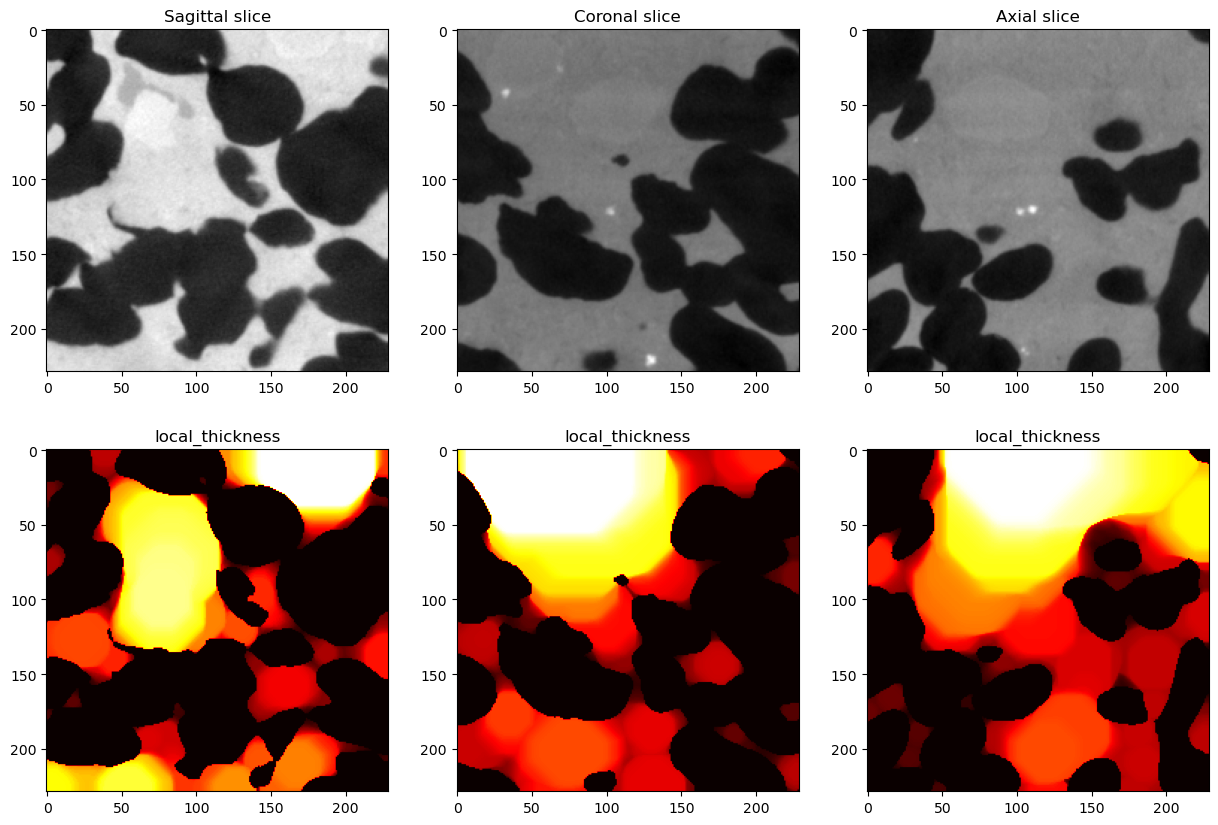

In [22]:
slice_n = 100

#----------------Sagittal slice----------------
fig, ax = plt.subplots(2,3,figsize=(15,10))
ax[0][0].imshow(np.squeeze(data_crop[slice_n,:,:]), cmap='gray')
ax[0][0].set_title('Sagittal slice')

ax[1][0].imshow(np.squeeze(thickness[slice_n,:,:]), cmap='hot')
ax[1][0].set_title('local_thickness')


#----------------Coronal view----------------

ax[0][1].imshow(np.squeeze(data_crop[:,slice_n,:]), cmap='gray')
ax[0][1].set_title('Coronal slice')

ax[1][1].imshow(np.squeeze(thickness[:,slice_n,:]), cmap='hot')
ax[1][1].set_title('local_thickness')


#----------------Axial view----------------

ax[0][2].imshow(np.squeeze(data_crop[:,:,slice_n]), cmap='gray')
ax[0][2].set_title('Axial slice')

ax[1][2].imshow(np.squeeze(thickness[:,:,slice_n]), cmap='hot')
ax[1][2].set_title('local_thickness')

plt.show()

In [23]:
data_air = data < air_stone_threshold
data_stone = (data > air_stone_threshold) & (data < stone_krystal_threshold)
data_krystal = data > stone_krystal_threshold

segmented_data = np.zeros(data.shape)
segmented_data[data_air] = 0
segmented_data[data_stone] = 1
segmented_data[data_krystal] = 2


In [26]:
# do some closing
from skimage.morphology import closing, isotropic_closing, disk, ball, cube
footprint = ball(9)
bin_data = data > global_threshold_otsu
bin_data = bin_data.astype(np.uint8)
closed_data = closing(bin_data, footprint=footprint)

In [ ]:
# do some closing
from skimage.morphology import closing, isotropic_closing, disk, ball, cube
footprint = ball(9)
bin_data = data > global_threshold_otsu
bin_data = bin_data.astype(np.uint8)
closed_data = isotropic_closing(bin_data, footprint=footprint)

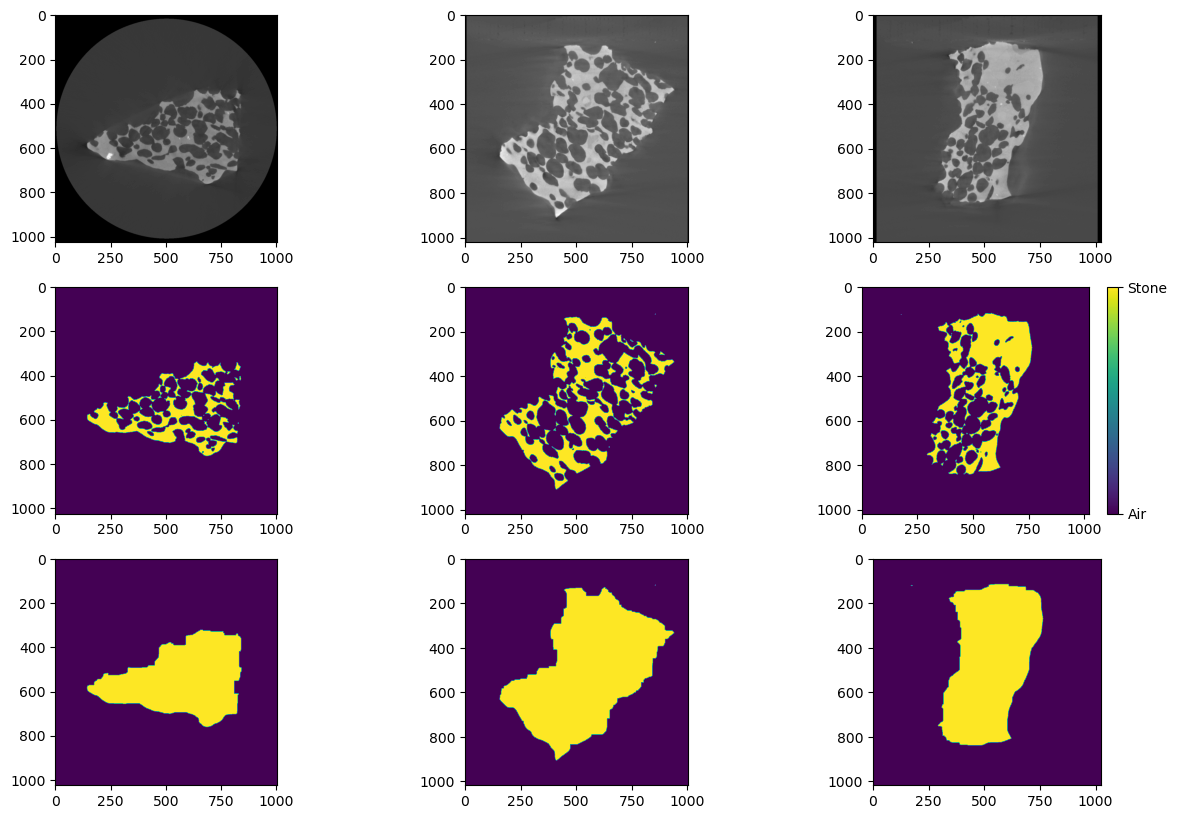

In [ ]:
# visualize the segmented data
slice = 500
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
ax[0,0].imshow(data[slice, :, :], cmap='gray')
ax[0,1].imshow(data[:,slice, :], cmap='gray')
ax[0,2].imshow(data[:, :, slice], cmap='gray')
ax[1,0].imshow(bin_data[slice, :, :])
ax[1,1].imshow(bin_data[:,slice, :])
ax[1,2].imshow(bin_data[:, :, slice])
ax[2,0].imshow(closed_data[slice, :, :])
ax[2,1].imshow(closed_data[:,slice, :])
ax[2,2].imshow(closed_data[:, :, slice])
# color bar
cbar = plt.colorbar(ax[1,2].imshow(bin_data[:, :, slice]))
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Air', 'Stone'])

plt.show()

In [ ]:
# use som closing

In [256]:
data_zeroed = data.copy()
data_zeroed[data_air] = 0

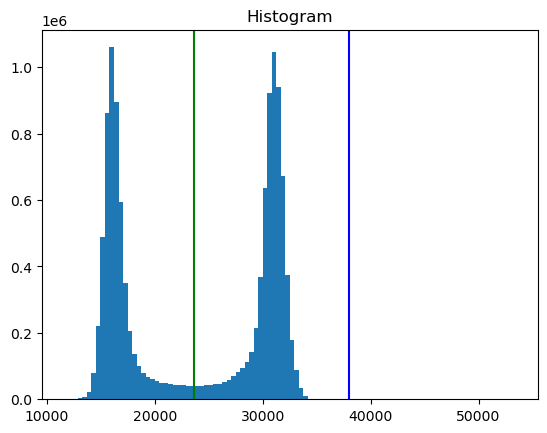

In [257]:
# make histogram
plt.hist(data_crop.flatten(), bins=100)
plt.axvline(air_stone_threshold, color='g')
plt.axvline(stone_krystal_threshold, color='b')
plt.title('Histogram')
plt.show()


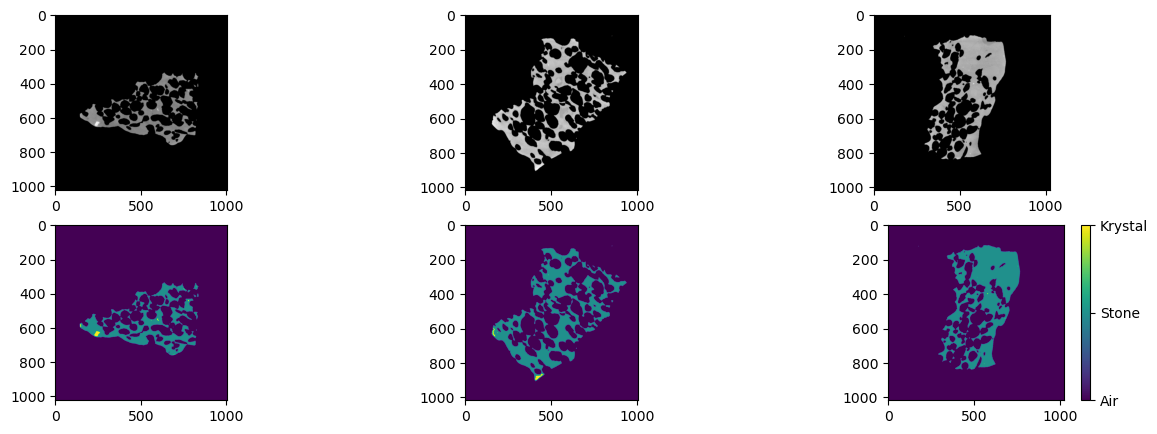

In [258]:
# visualize the segmented data
slice = 500
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
ax[0,0].imshow(data_zeroed[slice, :, :], cmap='gray')
ax[0,1].imshow(data_zeroed[:,slice, :], cmap='gray')
ax[0,2].imshow(data_zeroed[:, :, slice], cmap='gray')
ax[1,0].imshow(segmented_data[slice, :, :])
ax[1,1].imshow(segmented_data[:,slice, :])
ax[1,2].imshow(segmented_data[:, :, slice])
# color bar
cbar = plt.colorbar(ax[1,2].imshow(segmented_data[:, :, slice]))
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Air', 'Stone', 'Krystal'])

plt.show()

In [179]:
# save croped data
folder_path = 'results'
file_name = 'data.tiff'
absolute_path = os.path.join(folder_path, file_name)
dxchange.write_tiff(data, absolute_path, dtype='uint16', overwrite=True)


# save the bin data
file_name = 'bin_data.tiff'
absolute_path = os.path.join(folder_path, file_name)
dxchange.write_tiff(bin_data, absolute_path, dtype='uint8', overwrite=True)

# save the segmented data
file_name = 'segmented_data.tiff'
absolute_path = os.path.join(folder_path, file_name)
dxchange.write_tiff(segmented_data, absolute_path, dtype='uint8', overwrite=True)


In [263]:
thickness = lt.local_thickness(bin_data)

56.65686
2472.804
Median: 797.1106567382812  |  Mean: 992.1568603515625


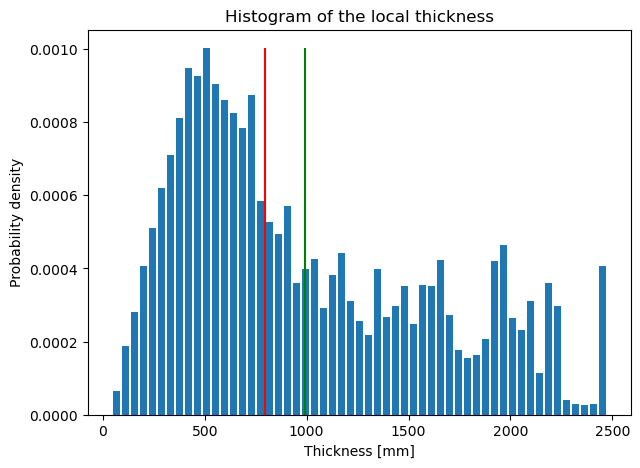

In [267]:
# Save the maximum value of thickness
vmax = np.max(thickness)
print(vmax)
#thickness is only the radius
thickness_new = 2*thickness
# we want it in real world units
thickness_new *= pixel_size

real_vmax = np.max(thickness_new)
real_vmin = np.min(thickness_new[thickness_new>0])
print(real_vmax)

# Compute median and mean value of the thickness
t = thickness_new[thickness_new>0].flatten()
medianThick = np.median(t)
meanThick = np.mean(t)
print(f'Median: {medianThick}  |  Mean: {meanThick}')


# Compute the histogram of the thickness
histThk, binsThk = np.histogram(thickness_new.flatten(), density=True , bins=int(np.floor(vmax)-1), range=(real_vmin,real_vmax))

# Compute the center of each bean
binsThkCent = binsThk[0:-1] + np.divide(binsThk[1:]-binsThk[0:-1],2)

# Plot the histogram as a bar plot for a better representation

fig, ax = plt.subplots(figsize=(7,5))
ax.bar(binsThkCent, histThk, width=0.8*pixel_size*2)
ax.vlines(medianThick, 0, np.max(histThk), color='r', label='Median')
ax.vlines(meanThick, 0, np.max(histThk), color='g', label='Mean')
ax.set_xlabel('Thickness [mm]')
ax.set_ylabel('Probability density')
#ax.set_yscale('log')
ax.set_title('Histogram of the local thickness')
plt.show()


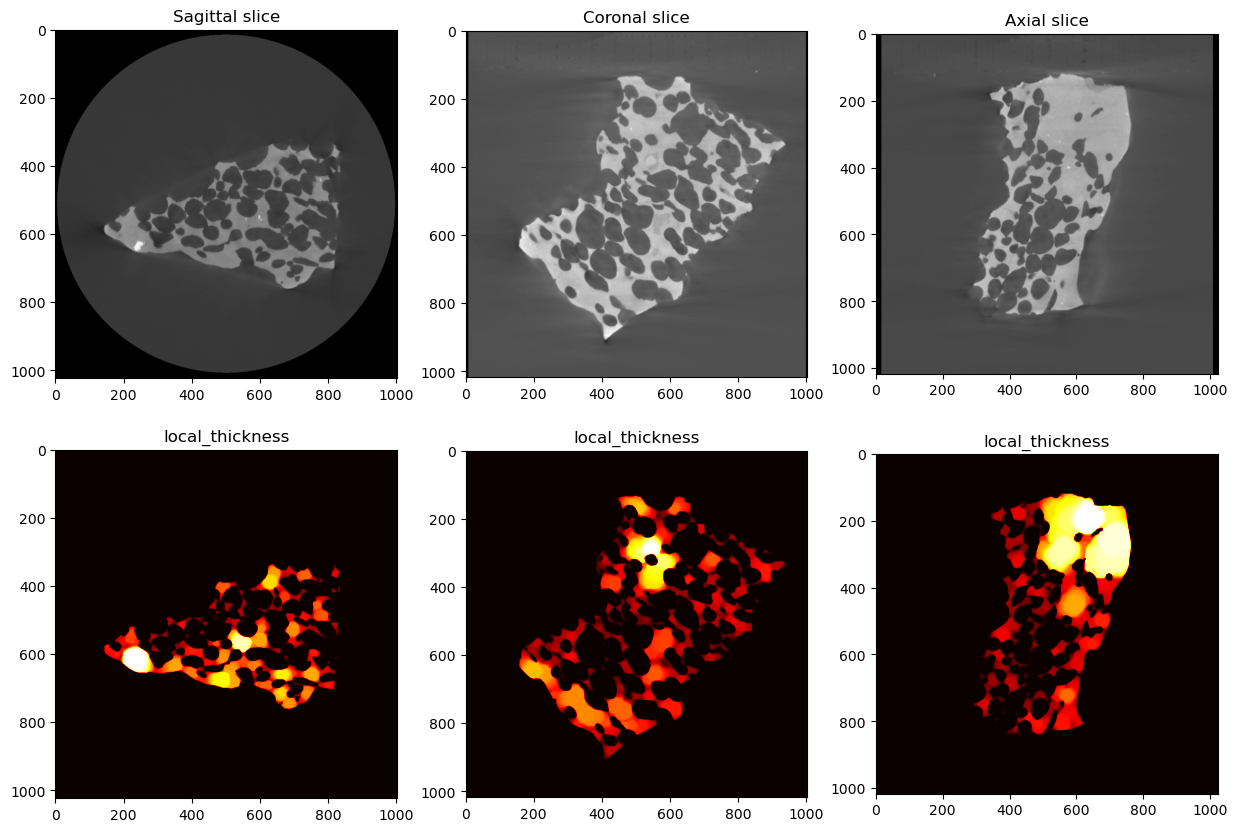

In [269]:
slice_n = 500

#----------------Sagittal slice----------------
fig, ax = plt.subplots(2,3,figsize=(15,10))
ax[0][0].imshow(np.squeeze(data[slice_n,:,:]), cmap='gray')
ax[0][0].set_title('Sagittal slice')

ax[1][0].imshow(np.squeeze(thickness[slice_n,:,:]), cmap='hot')
ax[1][0].set_title('local_thickness')


#----------------Coronal view----------------

ax[0][1].imshow(np.squeeze(data[:,slice_n,:]), cmap='gray')
ax[0][1].set_title('Coronal slice')

ax[1][1].imshow(np.squeeze(thickness[:,slice_n,:]), cmap='hot')
ax[1][1].set_title('local_thickness')


#----------------Axial view----------------

ax[0][2].imshow(np.squeeze(data[:,:,slice_n]), cmap='gray')
ax[0][2].set_title('Axial slice')

ax[1][2].imshow(np.squeeze(thickness[:,:,slice_n]), cmap='hot')
ax[1][2].set_title('local_thickness')

plt.show()

In [270]:
# save the thickness
file_name = 'thickness.tiff'
absolute_path = os.path.join(folder_path, file_name)
dxchange.write_tiff(thickness, absolute_path, dtype='uint16', overwrite=True)
# save the thickness
file_name = 'thickness_new.tiff'
absolute_path = os.path.join(folder_path, file_name)
dxchange.write_tiff(thickness_new, absolute_path, dtype='uint16', overwrite=True)


In [214]:
from skimage.filters import threshold_local

In [222]:
print(data_zeroed.shape)
print(data_zeroed[data_zeroed!=0].shape)
data_mean = data_zeroed[data_zeroed!=0].mean()
data_meaned = data_zeroed.copy()
data_meaned[data_meaned==0] = data_mean

(1018, 1024, 1004)
(61155707,)


In [226]:
# your code here
block_size = 55
offset = 0
local_threshold = threshold_local(data_meaned, block_size, offset=offset)
print(local_threshold.shape)


(1018, 1024, 1004)


In [227]:
segmented_data_local = data_zeroed.copy()
segmented_data_local[data_zeroed!=0] = 1 # stone
segmented_data_local[data_zeroed > local_threshold]= 2 # krystal

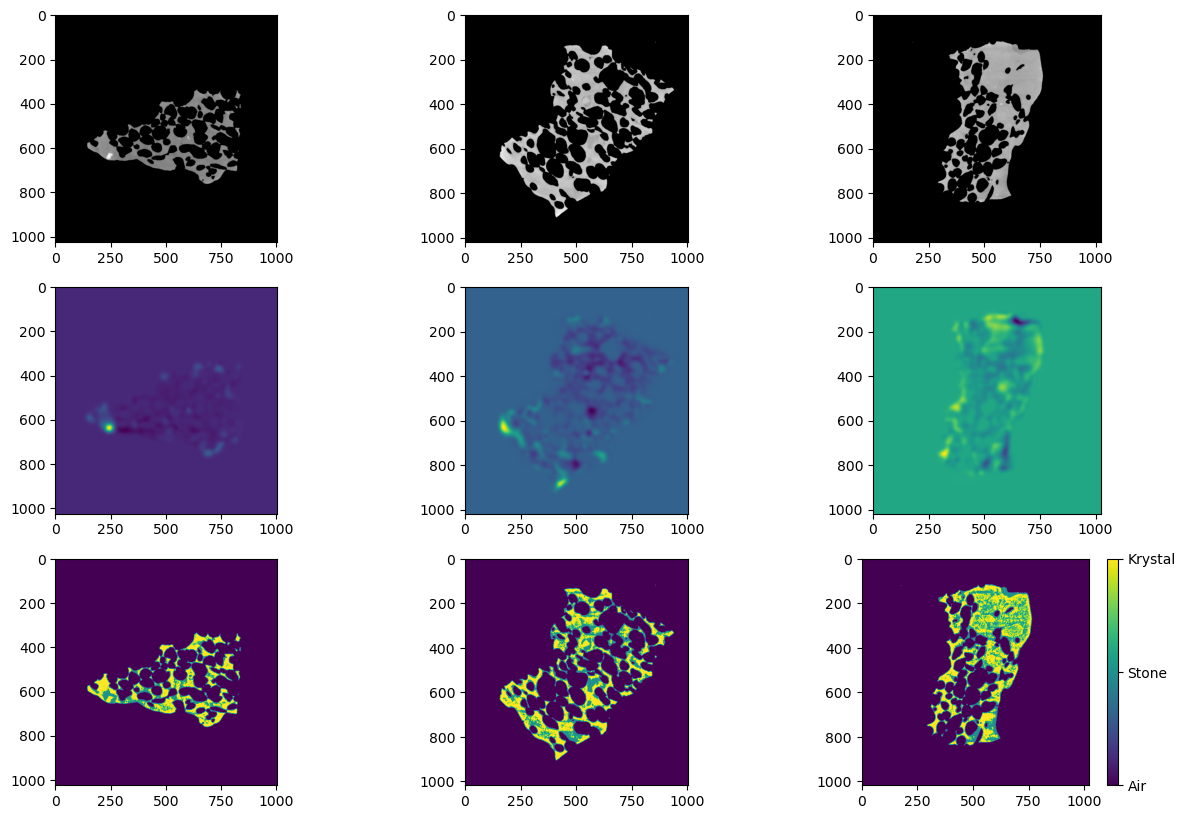

In [228]:
# visualize the segmented data
slice = 500
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
ax[0,0].imshow(data_zeroed[slice, :, :], cmap='gray')
ax[0,1].imshow(data_zeroed[:,slice, :], cmap='gray')
ax[0,2].imshow(data_zeroed[:, :, slice], cmap='gray')
ax[1,0].imshow(local_threshold[slice, :, :])
ax[1,1].imshow(local_threshold[:,slice, :])
ax[1,2].imshow(local_threshold[:, :, slice])
ax[2,0].imshow(segmented_data_local[slice, :, :])
ax[2,1].imshow(segmented_data_local[:,slice, :])
ax[2,2].imshow(segmented_data_local[:, :, slice])
# color bar
cbar = plt.colorbar(ax[2,2].imshow(segmented_data_local[:, :, slice]))
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Air', 'Stone', 'Krystal'])

plt.show()